In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data into Dataframe
df=pd.read_csv("C:/Users/hp/Downloads/Titanic-Dataset.csv")

In [3]:
# Preview the first 5 rows of the DataFrame 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

 Titanic dataset contains 891 rows and 12 columns i.e., Data has 891 individual passengers, each described by 12 attributes, including survival status, passenger class, age, fare, and more.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# summary statistics 
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The youngest among 891 passengers was just 0.42 years old (less than 6 months), while the oldest was 80 years old. The average age was about 29.7 years, suggesting that most passengers were relatively young adults.
Interestingly, only 714 passengers had their age recorded.

When it comes to family onboard, most people were traveling alone. The median for both SibSp (siblings/spouses) and Parch (parents/children) is 0. However, some individuals had up to 8 siblings or spouses, and others had as many as 6 parents or children traveling with them.

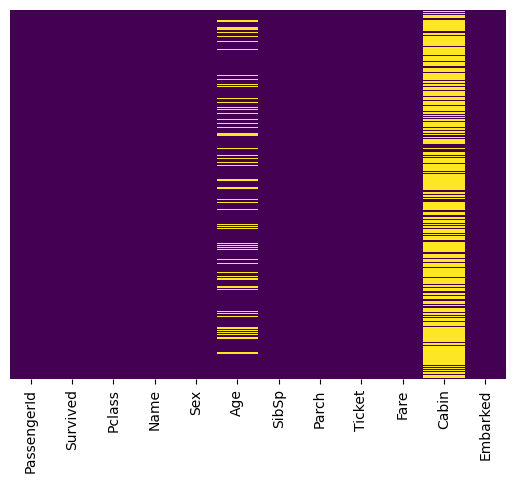

In [7]:
# Checking for missing value in the data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In the Titanic dataset, the columns with missing values are Age, Cabin, and Embarked. Among these, Cabin has the highest number of missing values, followed by Age, while Embarked has only a few missing entries.

In [9]:
# Cheking for duplicate values
df.duplicated().sum()

0

In [10]:
# Drop non-numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()
correlation_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


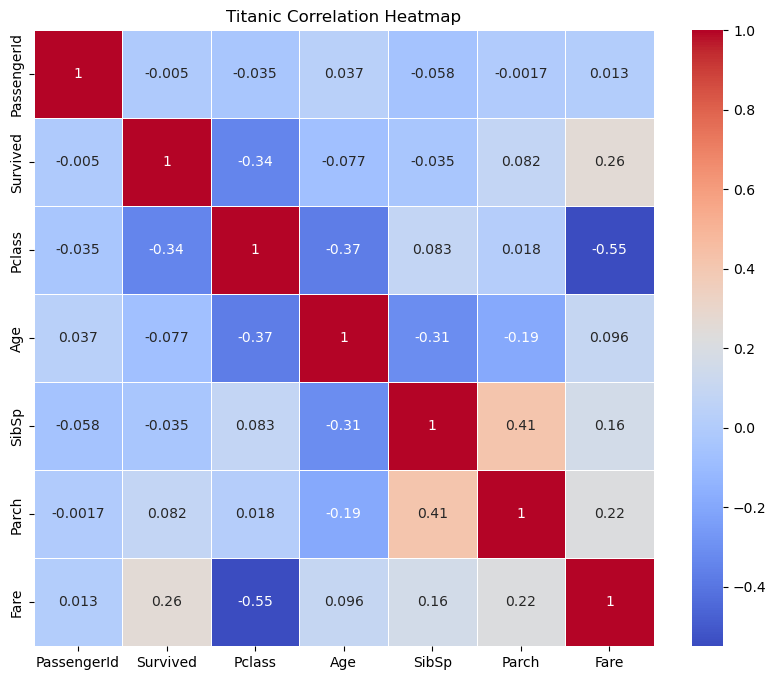

In [11]:
# plot For Correlation
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Titanic Correlation Heatmap')
plt.show()

Fare and Pclass have a moderate negative correlation — passengers in higher classes (lower Pclass number) generally paid higher fares.

Age shows weak or no strong correlation with most other features.

SibSp (siblings/spouses aboard) and Parch (parents/children aboard) show a moderate positive correlation, as they both relate to traveling with family

In [12]:
# Correlation of each variable with Survived column 
numeric_df.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

# 1.Categorical Data

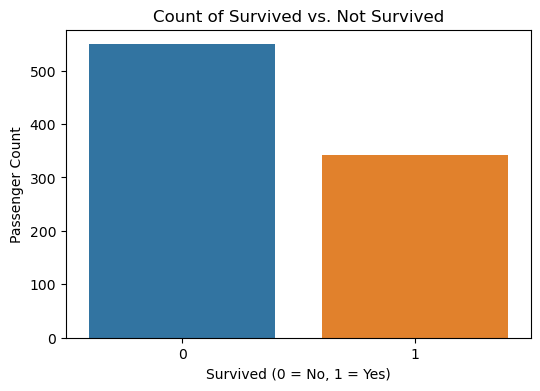

In [13]:
# Countplot for Survived 
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df)
plt.title('Count of Survived vs. Not Survived')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Passenger Count')
plt.show()

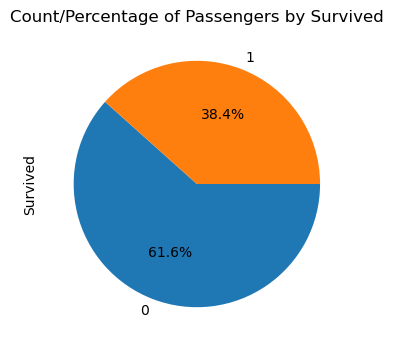

In [14]:
# Pie chart for Passengers Survived or Not Survived
plt.figure(figsize=(6,4))
df['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%',counterclock=False)
plt.title('Count/Percentage of Passengers by Survived')
plt.show()

Most passengers on the Titanic did not survive. About 61.8% lost their lives, and only 38% survived.

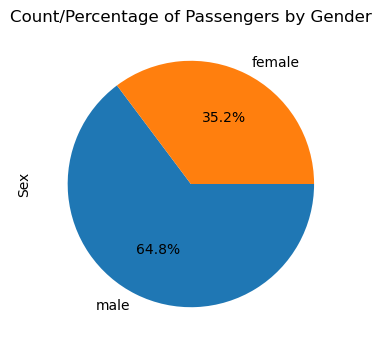

In [15]:
# Pie chart for Passengers count/percentage by Gender
plt.figure(figsize=(6,4))
df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%',counterclock=False)
plt.title('Count/Percentage of Passengers by Gender')
plt.show()

Most people on the ship were male, making up 64.8% of the passengers, while females made up the remaining 35.2%.

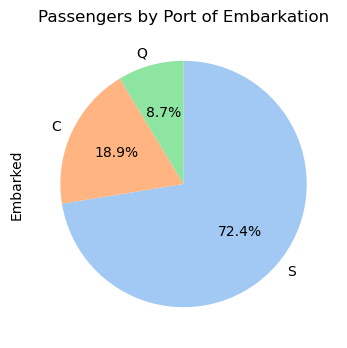

In [16]:
# Pie cahrt for Passengers by Port of Embarkation 
plt.figure(figsize=(6,4))
df['Embarked'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, counterclock=False,colors = sns.color_palette("pastel"))
plt.title('Passengers by Port of Embarkation')
plt.show()



Most people on the ship were Embarked from Southampton (S) port, making up 72.4% of the total passengers. Around 18.9% boarded from Cherbourg (C) and remaining 8.5% boarded from Queenstown (Q).

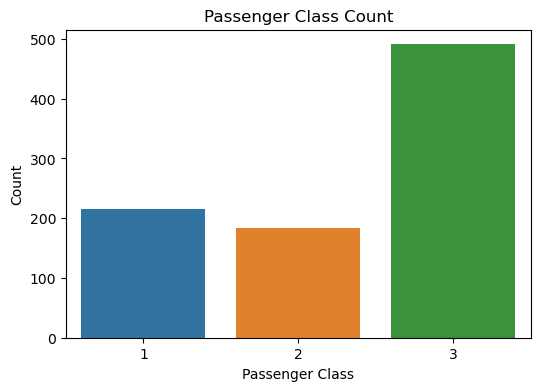

In [17]:
# Count plot for Passenger Class
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Count')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

Most of the people on the ship were from class 3.

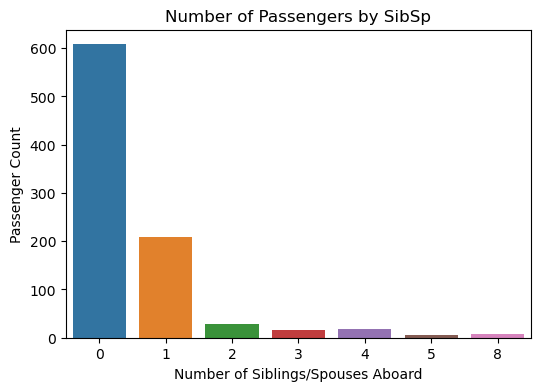

In [18]:
# Countplot for Siblings/Spouses Aboard
plt.figure(figsize=(6,4))
sns.countplot(x="SibSp", data=df)
plt.title("Number of Passengers by SibSp")
plt.xlabel("Number of Siblings/Spouses Aboard")
plt.ylabel("Passenger Count")
plt.show()

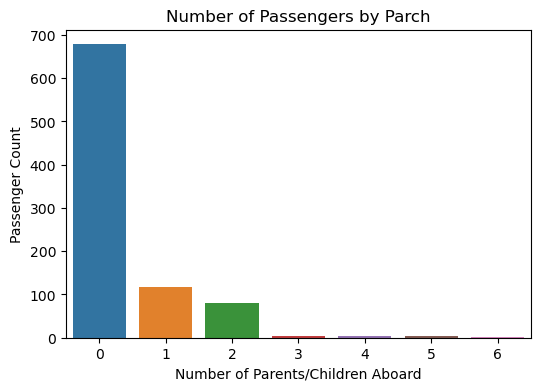

In [19]:
# Countplot for Parents/Children Aboard
plt.figure(figsize=(6,4))
sns.countplot(x="Parch", data=df)
plt.title("Number of Passengers by Parch")
plt.xlabel("Number of Parents/Children Aboard")
plt.ylabel("Passenger Count")
plt.show()

When it comes to family onboard, most people were traveling alone. However, some individuals had up to 8 siblings or spouses, and others had as many as 6 parents or children traveling with them onboard.

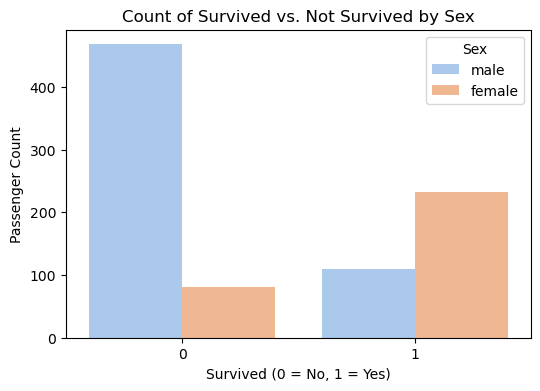

In [20]:
# Countplot for Survived by sex
plt.figure(figsize=(6,4))
sns.countplot(x='Survived',hue="Sex", data=df,palette="pastel")
plt.title('Count of Survived vs. Not Survived by Sex')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Passenger Count')
plt.show()

Most men did not survive, even though they made up the majority of passengers.
Females had a much higher survival rate than males.
This reflects the "women and children first" policy followed during the evacuation.

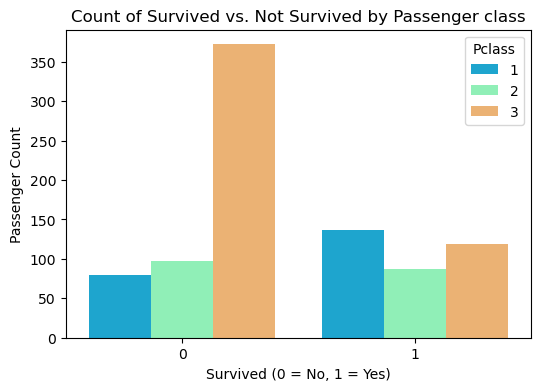

In [21]:
# Countplot for Survived by passenger class
plt.figure(figsize=(6,4))
sns.countplot(x='Survived',hue="Pclass", data=df,palette='rainbow')
plt.title('Count of Survived vs. Not Survived by Passenger class')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Passenger Count')
plt.show()

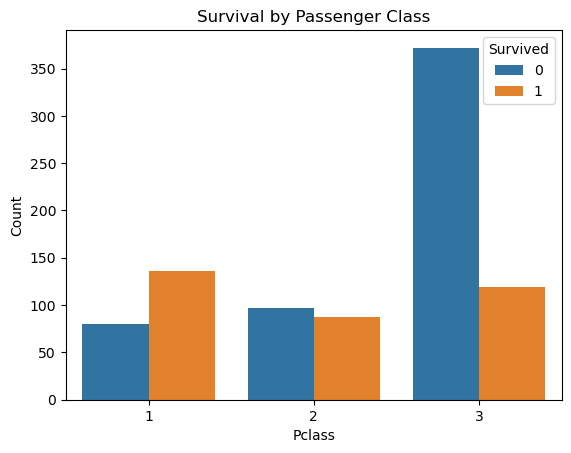

In [22]:
# Count plot for Survival by passenger class
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

1st class passengers had the highest survival rate.
3rd class passengers had the lowest chance of survival.
This shows that social status and access to lifeboats played a big role.

### 2) Numerical Data 

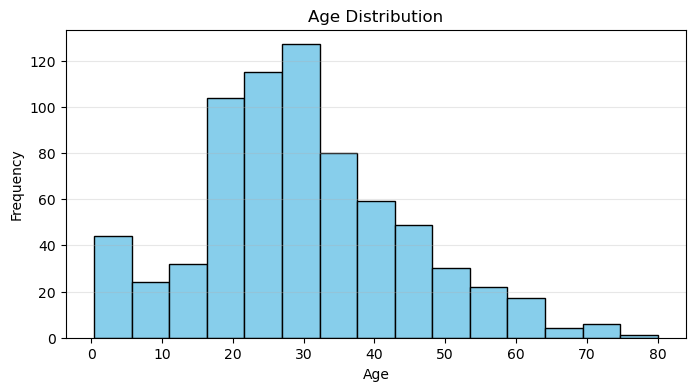

In [23]:
# Histogram for Age Distribution
plt.figure(figsize=(8,4))
plt.hist(df['Age'].dropna(), bins=15,color='skyblue', edgecolor='black')  # dropna to remove missing ages
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)
plt.show()

Most passengers were between 20 and 40 years old.

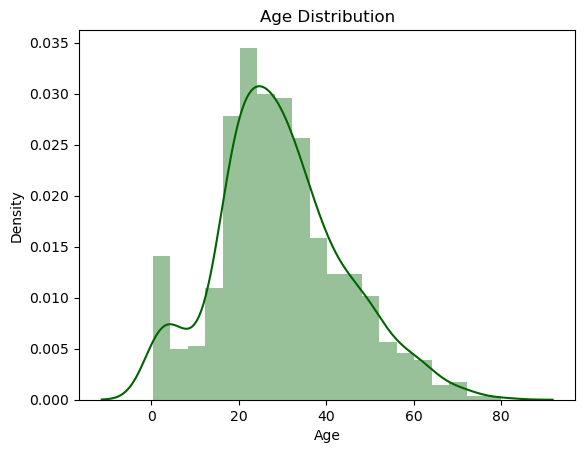

In [24]:
# Distplot for Age Distribution
sns.distplot(df["Age"].dropna(),color="darkgreen")
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


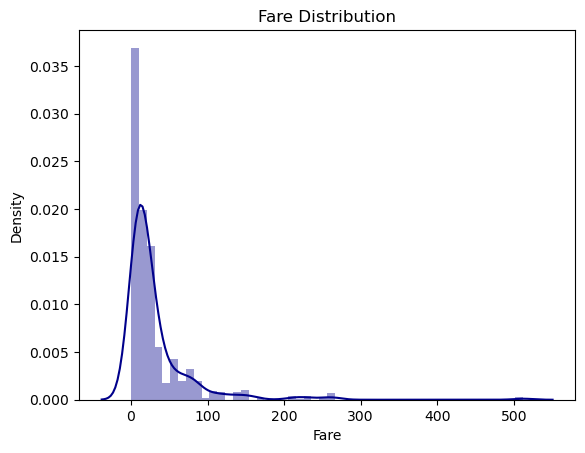

In [25]:
# Distplot for Fare Distribution
sns.distplot(df["Fare"],color="darkblue")
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.show()


Most passengers paid lower fares, usually between 0 and 50, while a few paid very high fares, going over 500, which is reflected in the right-skewed distribution.

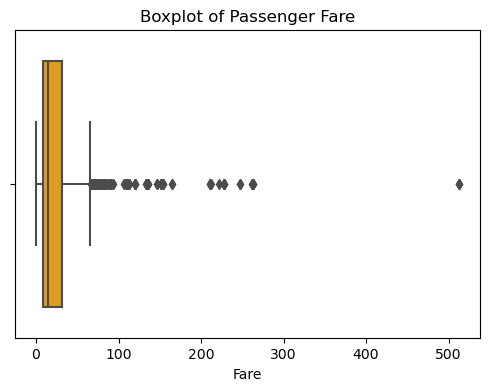

In [26]:
# Boxplot for Fare
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Fare'],color="orange")
plt.title('Boxplot of Passenger Fare')
plt.xlabel('Fare')
plt.show()

The median fare (middle value) is relatively low, indicating that most passengers paid a small amount.
There are many outliers — passengers who paid much higher fares, with some fares going well above 500.

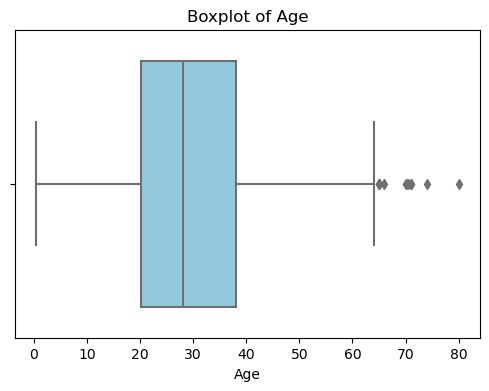

In [27]:
# boxplot for Age
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Age'],color="skyblue")
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

The median age (middle value) is around 28 years, meaning half the passengers were younger than 28.
Most ages fall within the range of about 20 to 40 years (this is the interquartile range, or IQR).
The plot shows a few outliers — very young children and older adults beyond 60.
The age distribution is fairly symmetrical, with a slight skew toward younger ages.

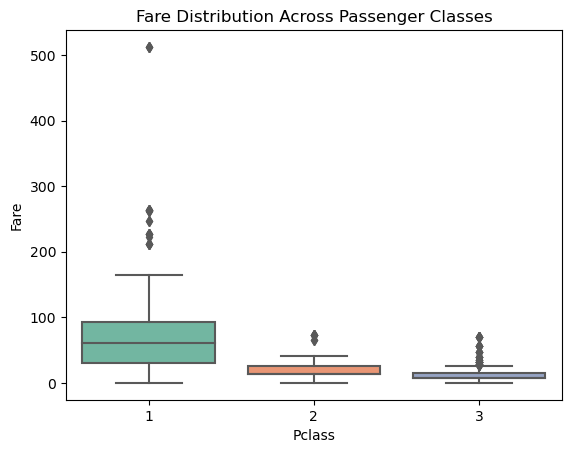

In [28]:
# Box Plot for Fare Distribution Across Passenger Classes
sns.boxplot(x="Pclass", y="Fare", data=df, palette="Set2")
plt.title("Fare Distribution Across Passenger Classes")
plt.show()

Fare amount is strongly related to passenger class. Higher class meant better accommodations and services, which came at a higher price. Most 3rd class passengers paid very little compared to 1st class travelers.

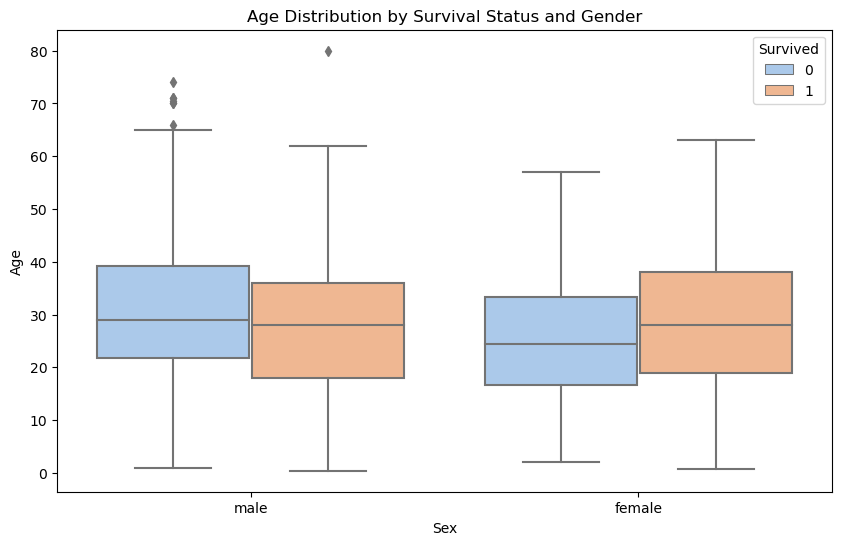

In [29]:
# Box plot for Age Distribution by Survival Status and Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x="Sex", y="Age", hue="Survived", data=df,palette="pastel")
plt.title("Age Distribution by Survival Status and Gender")
plt.xlabel("Sex")
plt.ylabel("Age")
plt.legend(title="Survived")
plt.show()

Among both males and females, the age range is quite wide — from infants to elderly.
For females who survived, the median age is slightly higher than that of those who did not survive.
For males who survived, the median age is slightly lower than that of those who did not survive.

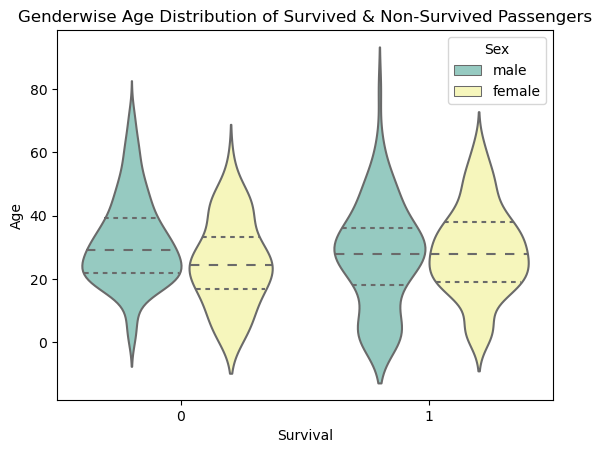

In [30]:
# Violin Plot for genderwise Age Distribution among Survived & Not Survived 
sns.violinplot(x="Survived", y="Age", hue="Sex",data=df, palette="Set3", inner="quartile")
plt.title("Genderwise Age Distribution of Survived & Non-Survived Passengers")
plt.xlabel('Survival')
plt.show()

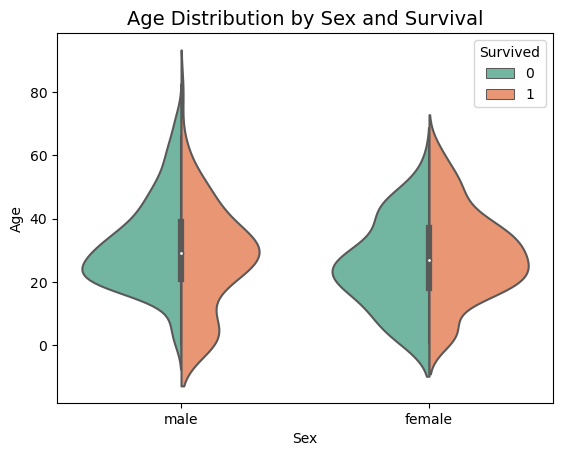

In [31]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived", 
data = df,palette="Set2", split = True);
# Title and labels
plt.title("Age Distribution by Sex and Survival", fontsize=14)
plt.xlabel("Sex")
plt.ylabel("Age");



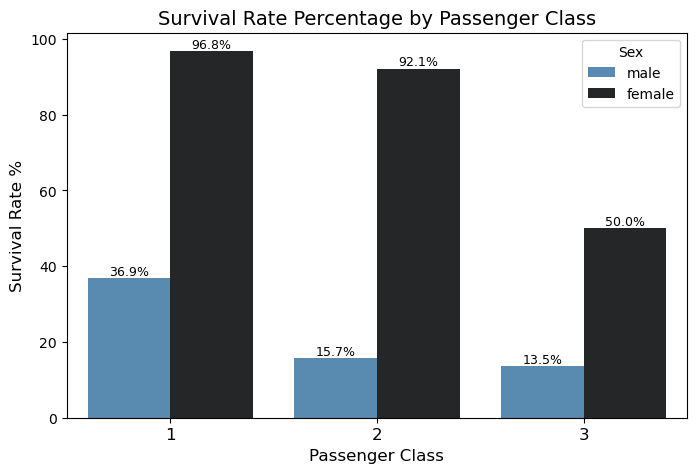

In [32]:
# Bar plot far Survival Rate by Class
plt.figure(figsize=(8, 5))
ax=sns.barplot(x=df["Pclass"], y=df["Survived"]*100,hue=df['Sex'],ci=None,palette="dark:#4a8cbf_r")
# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", fontsize=9)  # Format as percentage
plt.xlabel("Passenger Class",fontsize=12)
plt.ylabel("Survival Rate %",fontsize=12)
plt.title("Survival Rate Percentage by Passenger Class",fontsize=14)
plt.xticks(fontsize=12)
plt.show()

1st class females had the highest survival rate, close to 97%.
Survival rates drop as class goes from 1st to 3rd for both genders.
Male survival rates are much lower in all classes compared to females.

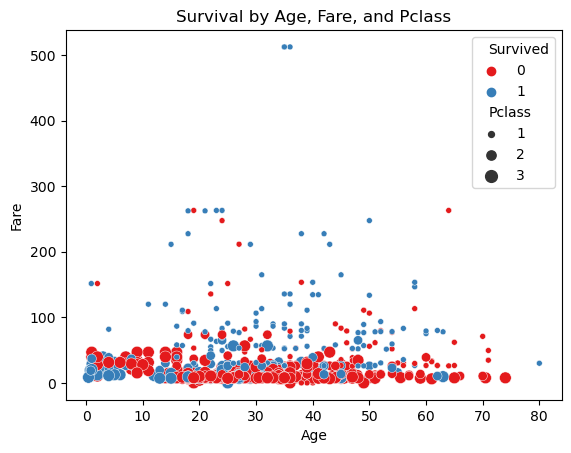

In [33]:
# Scatter plot for Pclass, Age, and Fare Impact on Survival
sns.scatterplot(x='Age', y='Fare', hue='Survived', size='Pclass',palette='Set1', data=df)
plt.title('Survival by Age, Fare, and Pclass')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

Many non-survivors are clustered at lower fares and middle age ranges, especially with bigger dots (lower classes).
Higher fares are associated with smaller dots (1st class passengers), and more survivors are seen in that group.
Survivors are mostly in the mid to higher fare range, and span all ages — but especially younger adults.